In [1]:
import pandas as pd
database = pd.read_excel('database_TCC.xlsx')
database = database[['A','E','N','Rt']]
database

,A,E,N,Rt
0,25,1,11,1.638
1,25,1,5,2.595
2,25,2,8,1.976
3,25,3,11,4.164
4,25,3,5,2.869
5,35,1,8,1.421
6,35,2,11,1.564
7,35,2,5,2.101
8,35,3,8,1.591
9,25,1,8,1.946


In [2]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
standardscaler.fit(database)
data = standardscaler.transform(database)
database = pd.DataFrame(data,columns=database.columns)

In [38]:
import pickle
pickle.dump(standardscaler, open('standard_scaler_Rt.pkl','wb'))

In [3]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,max_error

def split_x_and_y(database,x,y):
  dataset_x = database[x]
  dataset_y = database[y]
  return dataset_x,dataset_y


def scores(Y_true, Y_predicted):
  r2 = r2_score(Y_true, Y_predicted)
  meansquarederror = mean_squared_error(Y_true, Y_predicted)
  meanabsoluteerror = mean_absolute_error(Y_true, Y_predicted)
  maxerror = max_error(Y_true, Y_predicted)

  print('r2:',r2,'meansquarederror:',meansquarederror,'meanabsoluteerror:',meanabsoluteerror,'maxerror:',maxerror)
  return r2,meansquarederror,meanabsoluteerror,maxerror


# Random Forest Regressor

In [4]:
# database.iloc[[0,2,4,5,7,8]]

dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Rt')

test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Rt')

from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=5000,random_state=100)
RFR.fit(dataset_x,dataset_y)
RFR.score(test_x,test_y)

0.3306427822593704

In [5]:
RFR.feature_importances_

array([0.21042855, 0.33216308, 0.45740836])

In [44]:
import pickle
pickle.dump(RFR, open('Random_Forest_Regressor_Rt.pkl', 'wb'))

# SVM

In [45]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Rt')

test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Rt')

from sklearn import svm

svr = svm.SVR(kernel='sigmoid',C=3,gamma='auto')

svr.fit(dataset_x,dataset_y)
svr.score(test_x,test_y)

0.4359749662202925

In [46]:
import pickle
pickle.dump(svr, open('Support_Vector_Machine_Rt.pkl', 'wb'))

# MLP

In [29]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Rt')

test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Rt')

from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(max_iter=1000,random_state=100)
MLP.fit(dataset_x,dataset_y)
MLP.score(test_x,test_y)

-0.05892459425244634

In [23]:
# import pickle
# pickle.dump(MLP, open('MLP_Rt.sav', 'wb'))

# Keras

In [38]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.python.keras.layers import Dense
import pandas as pd
from tensorflow.keras import layers

import keras
from keras.models import Sequential
from keras.layers import Dense

variables,results = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Rt')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Rt')

model = keras.Sequential([
  layers.Dense(64, activation='sigmoid', input_shape=[len(variables.keys())]),
  # layers.Dropout(0.5),
  # layers.Dense(128, activation='relu'),
  layers.Dense(256, activation='relu'),
  # layers.Dense(32, activation='relu'),
  # layers.Dense(64, activation='relu'),
  # layers.Dropout(0.2),
  # layers.Dense(128, activation='relu'),
  # layers.Dense(64, activation='sigmoid'),
  # layers.Dense(8, activation='relu'),
  layers.Dense(1)
])

# optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

history = model.fit(variables.values,results.values,epochs=300,validation_split=0.2)

Epoch 1/300
1/1 [==============================] - 1s 518ms/step - loss: 1.3499 - mse: 1.3499 - val_loss: 0.7119 - val_mse: 0.7119
Epoch 2/300
1/1 [==============================] - 0s 30ms/step - loss: 1.3135 - mse: 1.3135 - val_loss: 0.6378 - val_mse: 0.6378
Epoch 3/300
1/1 [==============================] - 0s 25ms/step - loss: 1.2470 - mse: 1.2470 - val_loss: 0.4989 - val_mse: 0.4989
Epoch 4/300
1/1 [==============================] - 0s 28ms/step - loss: 1.1988 - mse: 1.1988 - val_loss: 0.4252 - val_mse: 0.4252
Epoch 5/300
1/1 [==============================] - 0s 35ms/step - loss: 1.1728 - mse: 1.1728 - val_loss: 0.4344 - val_mse: 0.4344
Epoch 6/300
1/1 [==============================] - 0s 46ms/step - loss: 1.1408 - mse: 1.1408 - val_loss: 0.5005 - val_mse: 0.5005
Epoch 7/300
1/1 [==============================] - 0s 39ms/step - loss: 1.1066 - mse: 1.1066 - val_loss: 0.5883 - val_mse: 0.5883
Epoch 8/300
1/1 [==============================] - 0s 32ms/step - loss: 1.0793 - mse: 1.0

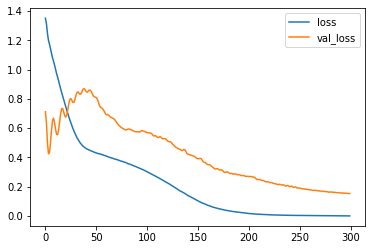

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

In [40]:
guess = model.predict(test_x.values)
desnormalizar = test_x.copy()
desnormalizar['Rt'] = guess
desnormalizado_teste = standardscaler.inverse_transform(desnormalizar)
desnormalizado_teste

1/1 [==============================] - 0s 78ms/step


array([[25.        ,  1.        ,  8.        ,  1.94816361],
       [25.        ,  2.        ,  5.        ,  2.70565477],
       [35.        ,  3.        , 11.        ,  2.84445748]])

In [43]:
desnormalizar = test_x.copy()
desnormalizar['Rt'] = test_y
desnormalizado_resultado = standardscaler.inverse_transform(desnormalizar)
desnormalizado_resultado

array([[25.   ,  1.   ,  8.   ,  1.946],
       [25.   ,  2.   ,  5.   ,  2.991],
       [35.   ,  3.   , 11.   ,  2.896]])

In [42]:
scores(desnormalizado_resultado[:,-1],desnormalizado_teste[:,-1])

r2: 0.8740986573441387 meansquarederror: 0.02802773723090565 meanabsoluteerror: 0.11301711868926027 maxerror: 0.2853452288352436


(0.8740986573441387,
 0.02802773723090565,
 0.11301711868926027,
 0.2853452288352436)

In [136]:
model.save("keras_model_Rt.h5")